<a href="https://colab.research.google.com/github/BrokenSpirits/Python-Programming/blob/main/CV_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
mnist_dataset = keras.datasets.mnist

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytrain.shape

(60000,)

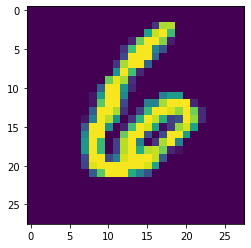

In [7]:
plt.imshow(xtrain[13])

In [8]:
ytrain[13]

6

In [9]:
#Preprocessing
xtrain=xtrain.reshape(60000,28*28) #gray_scale : 0 to 250, scale down in bw 0 & 1
xtrain=xtrain.astype('float32')/255 #float point division

In [10]:
xtest=xtest.reshape(10000,28*28)
xtest=xtest.astype('float32')/255

In [11]:
#Sequential API
dnn= keras.models.Sequential() #obj_name = calssname()

In [12]:
dnn.add(keras.layers.Dense(50,activation='relu',input_shape=xtrain.shape[1:]))

In [13]:
dnn.add(keras.layers.Dense(30,activation='relu'))

In [14]:
dnn.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [16]:
dnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
#Training
history_dnn = dnn.fit(x=xtrain,y=ytrain,validation_split=0.1,epochs =10,batch_size=16)

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2785 - accuracy: 0.9189 - val_loss: 0.1405 - val_accuracy: 0.9608
Epoch 2/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1355 - accuracy: 0.9589 - val_loss: 0.1202 - val_accuracy: 0.9665
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.1070 - val_accuracy: 0.9692
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0859 - accuracy: 0.9737 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 5/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0731 - accuracy: 0.9765 - val_loss: 0.1025 - val_accuracy: 0.9710
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 7/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.1057 - val_accuracy:

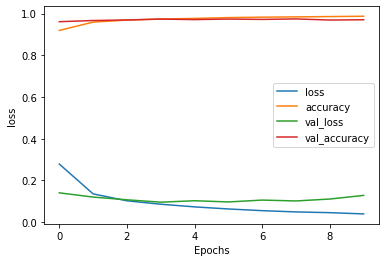

In [18]:
pd.DataFrame(history_dnn.history).plot()
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show()

In [19]:
test_loss,test_accuracy = dnn.evaluate(x=xtest,y=ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9685


In [20]:
ytest[13]

0

In [21]:
ypred=dnn.predict(x=xtest[13].reshape(1,28*28))
print(np.argmax(ypred)) #index with max probability

0
